# Assessing suitability of a location for thermal curtains and light shades to increase crop growth

## Introduction
Plants do not grow effectively and get can get damaged in high temperatures and too much sun.[(1)](https://extension.oregonstate.edu/gardening/techniques/environmental-factors-affecting-plant-growth#:~:text=Temperature%20influences%20most%20plant%20processes,photosynthesis%2C%20transpiration%20and%20respiration%20increase.) Conversely dull, cool days inhibit photosynthesis and plants do not grow efficiently. If temperatures drop too low plants may be damaged and leaves dropped impacting growth for many weeks.  

Many greenhouse growers choose to whitewash the glass to reflect the heat and dissipate the light. However, adding (and removing) whitewash is time consuming, so the wash is only applied once per season, meaning if a cooler or cloudier spell of weather occurs the plants can't grow optimally. An increasingly popular alternative is fitting greenhouses with shading curtains which are easier to remove on cloudier days and can been drawn at night to retain heat. Through this project we investigate areas of Ontario, Canada to see the impact on the number of growing days on lettuce crops grown in greenhouse using the different thermal techniques.

The meteostat platform has been used to access the weather data for the basis of this project [(2)](https://dev.meteostat.net/). Due to the amount of data it has been stored in a MySQL database and analysed using charts and predictions made using SciKitLearn.

## Import needed tools



In [47]:
# Create the mySQL database
import mysql.connector as msql

# Import the data and unzip it
import requests
import gzip
from io import BytesIO
import json

# Create the dataframe and manipulate it
import pandas as pd
import datetime as dt
import numpy as np

# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

# Regression analysis
from sklearn.metrics import r2_score
from scipy import stats

# Work with decimals
from decimal import Decimal

## Plant shading techniques
Each of the different plant shading techniques have different characteristics and efficiencies. White washing requires good knowledge on when to white wash and remove it, but is very cheap, thermal curtains are easier to use, but are more expensive to buy. Propriety data has been amended for this project to protect intellectual property but the techniques used to analyse the data are still valid.

### Read in the data

In [156]:
# Location of the data
DATADIR = "C:/Users/kirst/OneDrive - Atlantic TU/pfda/project/"
FILENAME = "thermal_data.csv"

# Read the data into a dataframe
df_tech = pd.read_csv (DATADIR + FILENAME)

### Plot the data

https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

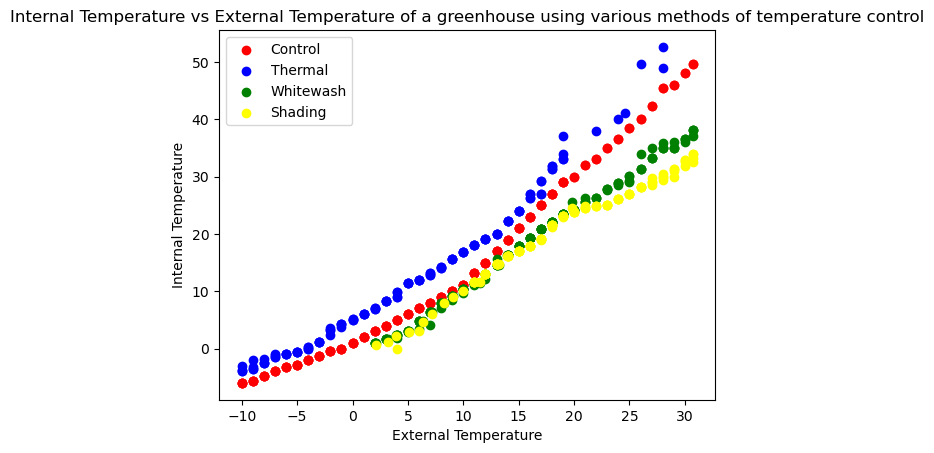

In [157]:
# Set the paratmeters for the plot
x = df_tech['External']
y1 = df_tech['Control']
y2 = df_tech['Thermal']
y3 = df_tech['Whitewash']
y4 = df_tech['Shading']

# Plot the data
plt.scatter(x,y1, color='red', label='Control')
plt.scatter(x,y2, color='blue', label='Thermal')
plt.scatter(x,y3, color='green', label='Whitewash')
plt.scatter(x,y4, color='yellow', label='Shading')

# Label the chart
plt.xlabel('External Temperature')
plt.ylabel('Internal Temperature')
plt.title('Internal Temperature vs External Temperature of a greenhouse using various methods of temperature control')
plt.legend()

# Show the plot
plt.show()


## Finding the impact of the different thermal techniques

### Whitewash
Whitewashing is the traditional approach to cooling a greenhouse. Once temperatures start to rise in the spring a layer of white wash is painted onto the roof of the greenhouse. This white wash reduces the amount of solar gain and cools the day time temperatures of the the greenhouse. The chart above shows that the relationship between the external temperature and the temperature inside a white washed greenhouse is basically linear.

Drop rows with missing data for whitewashing https://www.aporia.com/resources/how-to/drop-rows-pandas-dataframe-column-vamue-nan/


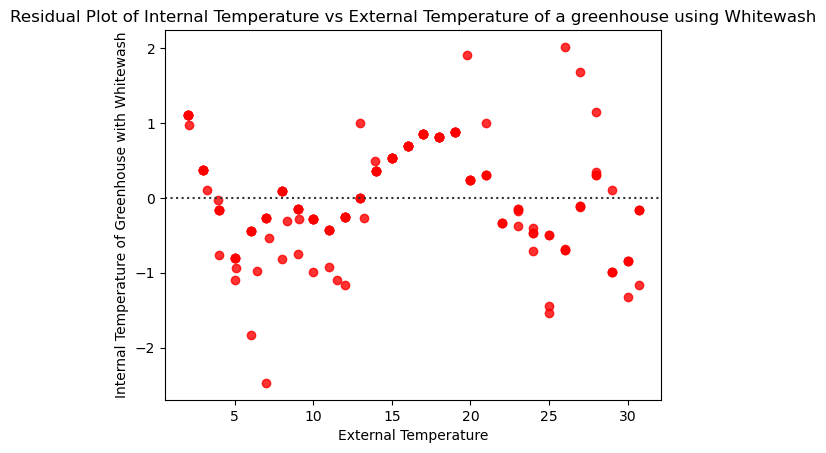

In [158]:
# Drop rows with missing values for whitewash
df_tech.dropna(subset=['Whitewash'], inplace=True)

# Select the data for the regression analysis
whitewash_data = df_tech[['Whitewash', 'External']]

# Set the x and y values
x = whitewash_data['External']
y = whitewash_data['Whitewash']

# Perform the regression analysis
sns.residplot(x=x, y=y, color="r")
              
# Label the chart
plt.xlabel('External Temperature')
plt.ylabel('Internal Temperature of Greenhouse with Whitewash')
plt.title('Residual Plot of Internal Temperature vs External Temperature of a greenhouse using Whitewash')
plt.show()

#### Linear regression

https://www.w3schools.com/python/python_ml_linear_regression.asp


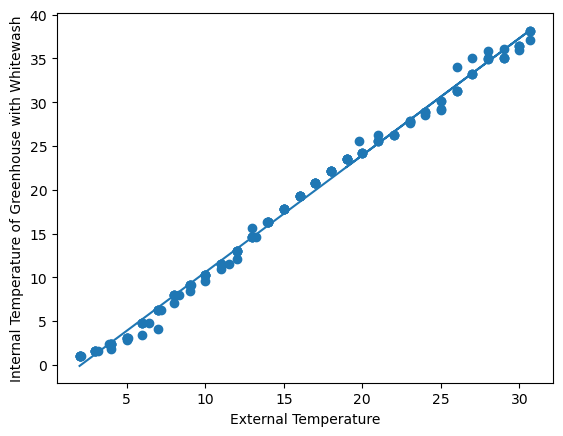

The R value is:  0.997896243628611
The P value is:  6.654913130932565e-185
The standard error is:  0.007000378113174909
The slope is:  1.3371590229461265
The intercept is:  -2.787064343413764


In [159]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('External Temperature')
plt.ylabel('Internal Temperature of Greenhouse with Whitewash')

plt.show()

print("The R value is: ", r_value)
print("The P value is: ", p_value)
print("The standard error is: ", std_err)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

### Thermal curtains

         2
0.03682 x + 0.6909 x + 6.088


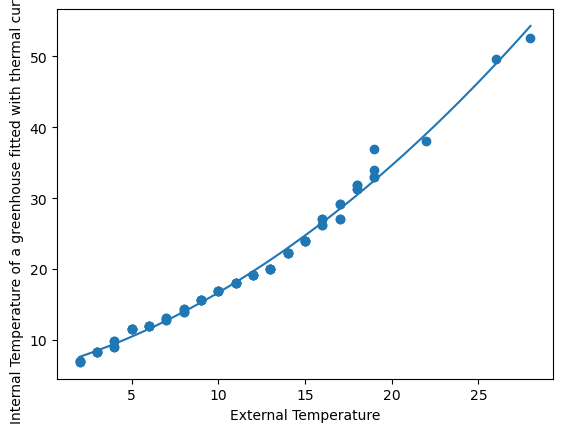

In [160]:
df_tech.dropna(subset=['Thermal'], inplace=True)
x = df_tech['External']
y = df_tech['Thermal']

p=np.polyfit(x,y,2)
f = np.poly1d(p)
print(f)

# Plot the regression line
x_new = np.linspace(x.min(), x.max(), 100)
y_model = f(x_new)

plt.scatter(x, y)
plt.plot(x_new, y_model)

#plt.plot(myline, mymodel(myline))
plt.xlabel('External Temperature')
plt.ylabel('Internal Temperature of a greenhouse fitted with thermal curtains')
plt.show()


### The test plants
"Head lettuce is the most important salad vegetable gown in the United States" [(2)](https://content.ces.ncsu.edu/lettuce). The optimum growing temperature for head lettuce is 15-18°C. At 20-26°C the plants start to flower and produce seed and need replacing and temperatures below 0°C will kill the plants.


In [62]:
lettuce_min = 0
lettuce_max = 20
lettuce_range1 = 15
lettuce_range2 = 20

Tomatoes are grown across the world and are an important staple in many cuisines. To increase their range and season many are grown in greenhouses. The optimal conditions for growth are 21-27°C with temperatures not dropping below 16°C or exceeding 29°C [(3)](https://drygair.com/blog/what-are-the-ideal-conditions-for-greenhouse-tomatoes/).

In [13]:
tomato_min = 16
tomato_max = 29
tomato_range1 = 21
tomato_range2 = 27

## Create a database to store the data
Due to the large amounts of data needed for this analysis. A MySQL database needs to be created. MySQL offers the ability to store very large amounts of data in a structured and easily accessible way, where the data is persistent. 

To create the database we first set the connection parameters for the database and create the cursor to enable the connection for making SQL queries.


In [81]:
# Set the parameters for the connection
db = msql.connect(host='localhost', user='root',password='')

# Create the cursor
cursor = db.cursor()

# Execute SQL query
cursor.execute('CREATE DATABASE weather')
print('The database "weather" has been created')

# Close the connection
cursor.close()
db.close()

The database "weather" has been created


### Create a table for the weather station data
Within the database a table needs to be created for each of the data sources. The first table will hold a list of the weather stations [(4)](https://dev.meteostat.net/bulk/stations.html#endpoints). The data about all the weather stations is available at: https://bulk.meteostat.net/v2/stations/lite.json.gz. It is compressed using `gzip` so the file needs to be decompressed before creating the dataframe and inserting the information into the database.

In [82]:
try:
    # Connect to MySQL
    con = msql.connect(host='localhost', database='weather', user='root', password='')

    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print(f"You're connected to database: {record}")
        
        # Drop the table if it exists
        cursor.execute('DROP TABLE IF EXISTS stations_data')
        print('Creating table....')
        
        # Create the table
        sql = """CREATE TABLE stations_data 
            (id VARCHAR(10) PRIMARY KEY, 
            name JSON, 
            country CHAR(2), 
            region VARCHAR(10), 
            national_id VARCHAR(10), 
            wmo_id VARCHAR(10), 
            icao_id VARCHAR(10), 
            iata_id VARCHAR(25), 
            latitude DECIMAL(9,6), 
            longitude DECIMAL(9,6), 
            elevation INT, 
            timezone VARCHAR(25),
            history JSON, 
            hourly_start DATE, 
            hourly_end DATE, 
            daily_start DATE,
            daily_end DATE,
            monthly_start YEAR,
            monthly_end YEAR,
            normals_start YEAR,
            normals_end YEAR
)"""
        cursor.execute(sql)
        print("Table is created....")

except msql.Error as err:
    print(err.msg)

finally:
    if con.is_connected():
        cursor.close()
        con.close()

You're connected to database: ('weather',)
Creating table....
Table is created....


### Read in the weather station data

Then the weather stations table needs to be populated.

In [83]:
# File name and location
url = "https://bulk.meteostat.net/v2/stations/full.json.gz"
file_name = "full.json.gz"

# Download the file
response = requests.get(url, stream=True)
with open(file_name, 'wb') as f:
    f.write(response.content)

# Decompress the file
with gzip.open(file_name, 'rt', encoding='utf-8') as gz_file:
    stations_file = json.load(gz_file)

# Connect to the MySQL Database
try:
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
        print("Connected to the database.")

        # Prepare SQL statement for data insertion
        sql_insert = """
            INSERT INTO stations_data (
                id, name, country, region, national_id, wmo_id, icao_id, iata_id,
                latitude, longitude, elevation, timezone, history,
                hourly_start, hourly_end, daily_start, daily_end,
                monthly_start, monthly_end, normals_start, normals_end
            ) VALUES (
                %(id)s, %(name)s, %(country)s, %(region)s, %(national_id)s, %(wmo_id)s, %(icao_id)s, %(iata_id)s,
                %(latitude)s, %(longitude)s, %(elevation)s, %(timezone)s, %(history)s,
                %(hourly_start)s, %(hourly_end)s, %(daily_start)s, %(daily_end)s,
                %(monthly_start)s, %(monthly_end)s, %(normals_start)s, %(normals_end)s
            )
        """

        # Insert Data into MySQL Table
        for station in stations_file:
            data = {
                'id': station.get('id'),
                'name': json.dumps(station.get('name', {})),  # Convert dictionary to JSON string
                'country': station.get('country'),
                'region': station.get('region'),
                'national_id': station.get('national'),
                'wmo_id': station.get('wmo'),
                'icao_id': station.get('icao'),
                'iata_id': station.get('iata'),
                'latitude': station.get('latitude'),
                'longitude': station.get('longitude'),
                'elevation': station.get('elevation'),
                'timezone': station.get('timezone'),
                'history': json.dumps(station.get('history', [])),  # Convert list to JSON string
                'hourly_start': station.get('inventory', {}).get('hourly', {}).get('start'),
                'hourly_end': station.get('inventory', {}).get('hourly', {}).get('end'),
                'daily_start': station.get('inventory', {}).get('daily', {}).get('start'),
                'daily_end': station.get('inventory', {}).get('daily', {}).get('end'),
                'monthly_start': station.get('inventory', {}).get('monthly', {}).get('start'),
                'monthly_end': station.get('inventory', {}).get('monthly', {}).get('end'),
                'normals_start': station.get('inventory', {}).get('normals', {}).get('start'),
                'normals_end': station.get('inventory', {}).get('normals', {}).get('end'),
            }
            cursor.execute(sql_insert, data)

        # Commit the transaction
        con.commit()
        print("Data inserted successfully.")

# Print details if an error occurs
except msql.Error as err:
    print(f"Error: {err}")

# Close the connection
finally:
    if con.is_connected():
        cursor.close()
        con.close()
        print("MySQL connection is closed.")

Connected to the database.
Data inserted successfully.
MySQL connection is closed.


### Select the country of interest


In [84]:
con = msql.connect(host='localhost', database='weather', user='root', password='')

cursor = con.cursor()

sql = "SELECT DISTINCT country FROM stations_data"

cursor.execute(sql)
results = cursor.fetchall()
print("The country codes are explained at: https://www.iban.com/country-codes")
print(f"The countries available are:")
for row in results:
    print(row)

cursor.close()
con.close()

The country codes are explained at: https://www.iban.com/country-codes
The countries available are:
('CA',)
('NO',)
('SE',)
('FI',)
('DE',)
('GB',)
('IM',)
('IE',)
('IS',)
('GL',)
('US',)
('FO',)
('DK',)
('NL',)
('XA',)
('BE',)
('FR',)
('LU',)
('CH',)
('CN',)
('LI',)
('PT',)
('ES',)
('GI',)
('CV',)
('AU',)
('AT',)
('CZ',)
('SK',)
('PL',)
('HU',)
('RS',)
('SI',)
('HR',)
('XK',)
('BA',)
('CS',)
('MK',)
('AL',)
('RO',)
('BG',)
('IT',)
('MT',)
('GR',)
('TR',)
('CY',)
('RU',)
('EE',)
('LV',)
('LT',)
('BY',)
('KZ',)
('UA',)
('MD',)
('KG',)
('GE',)
('AZ',)
('AM',)
('UZ',)
('TM',)
('TJ',)
('SY',)
('LB',)
('IL',)
('PS',)
('JO',)
('SA',)
('QA',)
('KW',)
('IQ',)
('IR',)
('AF',)
('BH',)
('AE',)
('OM',)
('YE',)
('PK',)
('BD',)
('IN',)
('NP',)
('LK',)
('MV',)
('MN',)
('HK',)
('MO',)
('TW',)
('KP',)
('KR',)
('JP',)
('MM',)
('TH',)
('MY',)
('MX',)
('SG',)
('VN',)
('LA',)
('KH',)
('EH',)
('MA',)
('DZ',)
('TN',)
('LY',)
('NE',)
('ML',)
('MR',)
('SN',)
('GM',)
('GW',)
('GN',)
('SL',)
('SH',)
('AQ',)
('ST

The user should be prompted to select the country of interest. 


In [85]:
try:
    # Connect to the database
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
        
        # Get user to input the country code
        chosencountry = input(str("Enter the country of interest, using the two digit code: ")).strip().upper()
        
        # Check the user input is valid
        if len(chosencountry) != 2:
            print("Invalid country code. Please enter a valid 2- character country code.")
        else: # Exectute the SQL query
            query = sql = "SELECT DISTINCT region FROM stations_data WHERE country = %s"
            cursor.execute(query, (chosencountry,)) 
            
            # Fetch and display the results
            results = cursor.fetchall()
            if results:
                print(f"The regions within {chosencountry} available are:")
                for row in results:
                    print(row)
            else:
                print(f"No regions found for country code: {chosencountry}")
                
except msql.Error as err:
    print(err)

finally:
    if con.is_connected():
        cursor.close()
        con.close()


The regions within CA available are:
('AB',)
('MB',)
('BC',)
('SK',)
('NU',)
('ON',)
('YT',)
('QC',)
('NS',)
('NL',)
('NT',)
('PE',)
('NB',)
('SD',)
('NF',)


### Select the weather stations in the country and region of interest

In [86]:
try:
    # Connect to the database
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
        
        # Get user to input the region code
        chosenregion = input(str("Enter the region of interest, using the two digit code: ")).strip().upper()
        
        # Check the user input is valid
        if len(chosenregion) != 2:
            print("Invalid region code. Please enter a valid 2- character region code.")
        else: # Execute the SQL query
            query ="SELECT id FROM stations_data WHERE country = %s AND region = %s AND daily_start IS NOT NULL"
            cursor.execute(query, (chosencountry, chosenregion,)) 
            
            # Fetch and display the results
            station_ids = [str(row[0]) for row in cursor.fetchall()]
            if results:
                print(f"The stations within {chosenregion} are:")
                for row in station_ids:
                    print(row)
            else:
                print(f"No stations found for region code: {chosenregion} in country code: {chosencountry}")
                
except msql.Error as err:
    print(err)

finally:
    if con.is_connected():
        cursor.close()
        con.close()

The stations within ON are:
0CNUO
0CO7B
0FV1F
0FV2W
10RIK
128HL
13178
17CKT
1D16Y
1J1PJ
1JWST
1Y8OJ
21O3U
2FXL8
2W8UZ
2XUGG
3EADS
3S56J
44BUQ
4DA9G
4DUJO
5MKGL
5RUZT
65YVF
6N2T2
71063
71099
71151
71161
71171
71172
71193
71260
71261
71262
71263
71265
71270
71272
71281
71282
71290
71291
71292
71294
71295
71296
71297
71298
71299
71300
71301
71303
71307
71309
71314
71352
71368
71369
71399
71430
71431
71432
71433
71434
71435
71436
71437
71438
71439
71460
71462
71463
71464
71465
71466
71468
71508
71527
71534
71538
71559
71573
71581
71582
71620
71621
71623
71624
71625
71628
71629
71630
71631
71632
71633
71639
71642
71655
71660
71667
71672
71694
71697
71704
71730
71731
71733
71735
71738
71739
71747
71749
71750
71751
71752
71755
71767
71820
71831
71832
71834
71835
71836
71841
71842
71844
71845
71846
71850
71854
71956
71962
75BU2
7FGUJ
7L5OL
7PXZ6
7Q717
7ZTNB
82JYP
86WK3
8HNVP
8IOCM
8PJPB
8TSI8
8WZUG
93RHE
9GNQU
9H92X
9HC7K
9K6D9
9M4XD
9W5OW
ADBC1
AE2A1
ATA0X
BI2NY
CNR66
CTAL0
CTCK0
CTGT0
CTWN0


## Create a table for the weather data for each region

### Create table for the weather data for the chosen country and region

In [87]:
table_name = f"{chosencountry}_{chosenregion}_data".lower()

try:
    # Connect to MySQL
    con = msql.connect(host='localhost', database='weather', user='root', password='')

    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print(f"You're connected to database: {record}")
        
        # Drop the table if it exists
        drop_query = f"DROP TABLE IF EXISTS `{table_name}`"
        cursor.execute(drop_query)
        print(f"Table '{table_name}' dropped if it existed.")
        
        # Create the table
        create_query = f"""
        CREATE TABLE `{table_name}` (
            id VARCHAR(10) PRIMARY KEY, 
            station_id VARCHAR(10),
            date DATE,
            avg_temp DECIMAL(5,1), 
            min_temp DECIMAL(5,1),
            max_temp DECIMAL(5,1),
            month INT,
            year YEAR
        )
        """
        cursor.execute(create_query)
        print(f"Table '{table_name}' is created successfully.")

except msql.Error as err:
    print(err.msg)

finally:
    if con.is_connected():
        cursor.close()
        con.close()

You're connected to database: ('weather',)
Table 'ca_on_data' dropped if it existed.
Table 'ca_on_data' is created successfully.


Now the table needs to be populated with the data for each of the weather stations in the chosen country and region.

In [88]:
table_name = f"{chosencountry}_{chosenregion}_data".lower()

# Connect to the MySQL Database
try:
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
        print("Connected to the database.")

        # Insert Data into MySQL Table
        for station in station_ids:
            print(f"Processing station: {station}")

            # Download the file
            url = f"https://bulk.meteostat.net/v2/daily/{station}.csv.gz"
            response = requests.get(url)
            response.raise_for_status()  # Ensure the request was successful

            if response.status_code == 200:
                # Read the CSV file into a DataFrame
                stations_data = gzip.GzipFile(fileobj=BytesIO(response.content))
                df = pd.read_csv(stations_data, usecols=[0, 1, 2, 3], names=['date', 'avg_temp', 'min_temp', 'max_temp'], parse_dates=['date'])
                df.dropna(inplace=True)

                # Add a station ID column
                df['station_id'] = station

                # Add month and year columns
                df["year"] = df["date"].dt.year
                df["month"] = df["date"].dt.month

                counter = 0
                for _, row in df.iterrows():
                    # Create a unique ID for each row
                    id = f"{row['station_id']}_{counter}"
                    
                    # Prepare SQL statement for data insertion
                    sql_insert = f"""
            INSERT INTO `{table_name}` (id, station_id, date, avg_temp, min_temp, max_temp, month, year) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        """
                    # Insert data into MySQL table
                    cursor.execute(sql_insert,(
                        id,
                        row["station_id"],
                        row["date"].date(),
                        row.get("avg_temp", None),
                        row.get("min_temp", None),
                        row.get("max_temp", None),
                        row["month"],
                        row["year"],
                    ))
                    counter += 1
                con.commit()
                print(f"Data from station {station} inserted successfully.")
            else:
                print(f"Failed to download data for station: {station}")
except msql.Error as err:
    print(f"Error: {err}")

# Close the connection
finally:
    if con.is_connected():
        cursor.close()
        con.close()
        print("MySQL connection is closed.")






Connected to the database.
Processing station: 0CNUO
Data from station 0CNUO inserted successfully.
Processing station: 0CO7B
Data from station 0CO7B inserted successfully.
Processing station: 0FV1F
Data from station 0FV1F inserted successfully.
Processing station: 0FV2W
Data from station 0FV2W inserted successfully.
Processing station: 10RIK
Data from station 10RIK inserted successfully.
Processing station: 128HL
Data from station 128HL inserted successfully.
Processing station: 13178
Data from station 13178 inserted successfully.
Processing station: 17CKT
Data from station 17CKT inserted successfully.
Processing station: 1D16Y
Data from station 1D16Y inserted successfully.
Processing station: 1J1PJ
Data from station 1J1PJ inserted successfully.
Processing station: 1JWST
Data from station 1JWST inserted successfully.
Processing station: 1Y8OJ
Data from station 1Y8OJ inserted successfully.
Processing station: 21O3U
Data from station 21O3U inserted successfully.
Processing station: 2FXL

## Analysing the weather data
https://dev.meteostat.net/bulk/daily.html#endpoints

### Average the data by month

First get the user to select a station id


In [89]:

chosencountry = input(str("Enter the country of interest, using the two digit code: "))
chosenregion = input(str("Enter the region of interest, using the two digit code: "))


Use this choice to extract the daily average temperature data for the station of interest from the database.

In [90]:
table_name = f"{chosencountry}_{chosenregion}_data".lower()

con = None
try:
    # Connect to the database
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
        
        #Request user to input the station ID
        chosenstation = input(str("Enter the station ID of interest: ").strip().upper())
        
        if chosenstation in station_ids:
            print(f"Station {chosenstation} is available.")
        else:
            print(f"Please choose from one of the following station IDs: {station_ids}")
        
        # Execute the SQL query
        query =f"SELECT date, avg_temp, min_temp, max_temp, month, year FROM `{table_name}` WHERE station_id = %s"
        cursor.execute(query, (chosenstation,))
        rows = cursor.fetchall()
        
        # Create a DataFrame
        df= pd.DataFrame(rows)
        df.columns=['date', 'avg_temp', 'min_temp', 'max_temp', 'month', 'year']
        
        # Print the first 5 rows
        print(df.head(5))

except msql.Error as err: 
    print(err)

finally:
    if con and con.is_connected():
        cursor.close()
        con.close()

Station 10RIK is available.
         date avg_temp min_temp max_temp  month  year
0  2000-01-01     -2.5    -11.0      6.0      1  2000
1  2000-01-02      5.0     -2.0     12.0      1  2000
2  2000-01-03     -0.3     -2.0      1.5      1  2000
3  2000-01-04      4.5     -2.0     11.0      1  2000
4  2000-01-05     -8.8    -11.5     -6.0      1  2000


### Plot the data for the average temperature


In [ ]:
# Group by year and month, then calculate the average temperature for each month
monthly_avg = df.groupby(["year", "month"])["avg_temp"].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
years = monthly_avg["year"].unique()

# Draw a horizontal line at y_value
plt.axhline(y=lettuce_range1, color='r', linestyle='--', label=f'y = Lower optimal growth limit for lettuce: {lettuce_range1}')
plt.axhline(y=lettuce_range2, color='r', linestyle='--', label=f'y = Upper optimal growth limit for lettuce: {lettuce_range2}')
plt.axhline(y=lettuce_min, color='b', linestyle='--', label=f'y = Damage limit for lettuce: {lettuce_min}')
for year in years:
    year_data = monthly_avg[monthly_avg["year"] == year]
    plt.plot(year_data["month"], year_data["avg_temp"], marker="o", label=str(year))


plt.title(f"Average Monthly Temperature for Station {chosenstation} in {chosencountry} - {chosenregion}")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="best", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


NameError: name 'df' is not defined

### Average minimum temperatures

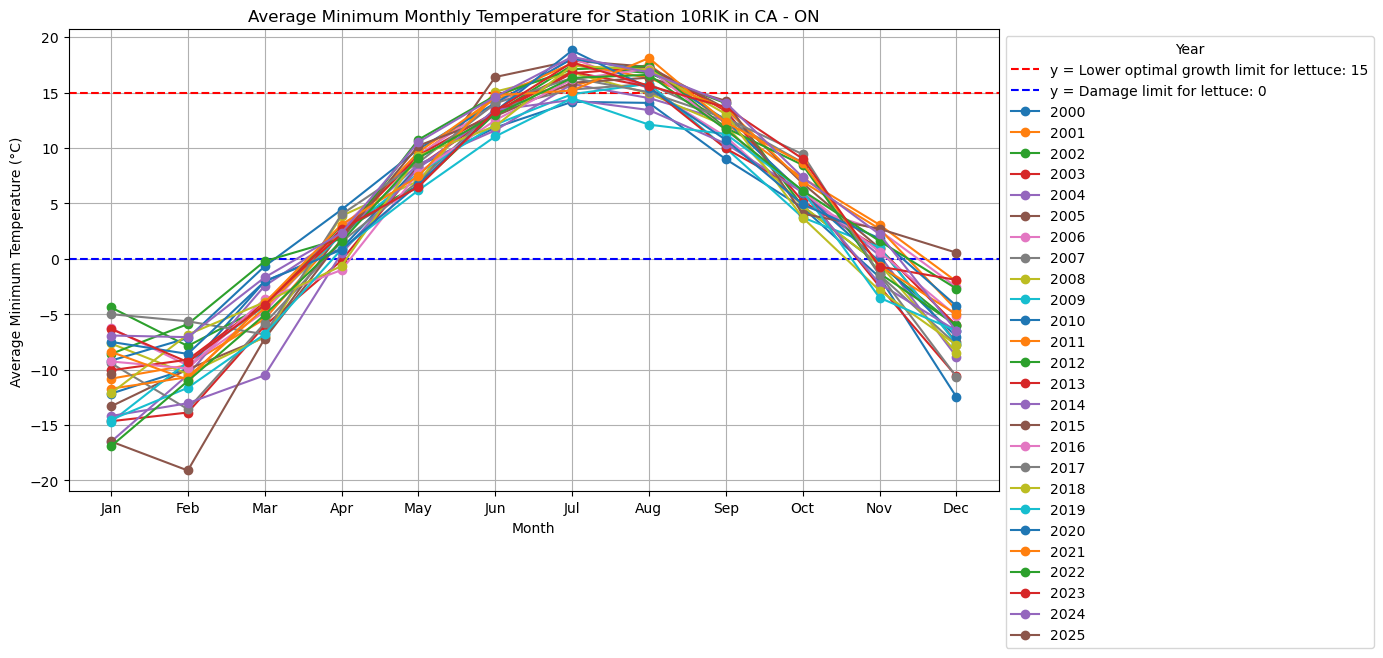

In [ ]:
df.dropna(subset=['min_temp'], inplace=True)
# Group by year and month, then calculate the minimum average temperature for each month
min_monthly_avg = df.groupby(["year", "month"])["min_temp"].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
years = min_monthly_avg["year"].unique()

# Draw a horizontal line at y_value
plt.axhline(y=lettuce_range1, color='r', linestyle='--', label=f'y = Lower optimal growth limit for lettuce: {lettuce_range1}')
plt.axhline(y=lettuce_min, color='b', linestyle='--', label=f'y = Damage limit for lettuce: {lettuce_min}')

# Plot the data
for year in years:
    year_data = min_monthly_avg[min_monthly_avg["year"] == year]
    plt.plot(year_data["month"], year_data["min_temp"], marker="o", label=str(year))


plt.title(f"Average Minimum Monthly Temperature for Station {chosenstation} in {chosencountry} - {chosenregion}")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="best", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Analysing the impact of thermal curtains on the minimum temperatures




In [140]:
# Calculate the number of cold days per month and year
cold_days_count = (df.groupby(["year", "month"]).size().reset_index(name="cold_days_count"))

# Print the results
print(cold_days_count)



     year  month  cold_days_count
0    2000      1               31
1    2000      2               29
2    2000      3               31
3    2000      4               30
4    2000      5               31
..    ...    ...              ...
296  2024      9               27
297  2024     10               31
298  2024     11               30
299  2024     12               27
300  2025      1               10

[301 rows x 3 columns]


### Calculate the impact of the thermal curtains



In [100]:
print(f)

<function f at 0x00000189FB0C47C0>


In [141]:
# Define the regression function
def f(temp):
    # Ensure temp is converted to a float for compatibility
    temp = float(temp)
    return 0.03538656 * temp**2 + 0.70891686 * temp + 6.14413969

# Convert min_temp column to float if necessary
df["avg_temp"] = df["avg_temp"].astype(float)

# Generate prediction for the internal temperature
df["temp_curtains"] = df["avg_temp"].apply(f)

# Identify cold days where temperature is below the threshold
df["cold_days_curtains"] = df["temp_curtains"] < lettuce_range1

# Display results
print(df.head())

# Filter and print rows where cold days are identified
cold_days_count_thermal = df[df["cold_days_curtains"]]
print(cold_days_count_thermal)


        date  avg_temp  min_temp max_temp  month  year  temp_curtains  \
0 2000-01-01      -2.5     -11.0      6.0      1  2000       4.593014   
1 2000-01-02       5.0      -2.0     12.0      1  2000      10.573388   
2 2000-01-03      -0.3      -2.0      1.5      1  2000       5.934649   
3 2000-01-04       4.5      -2.0     11.0      1  2000      10.050843   
4 2000-01-05      -8.8     -11.5     -6.0      1  2000       2.646007   

   cold_days_curtains  
0                True  
1                True  
2                True  
3                True  
4                True  
           date  avg_temp  min_temp max_temp  month  year  temp_curtains  \
0    2000-01-01      -2.5     -11.0      6.0      1  2000       4.593014   
1    2000-01-02       5.0      -2.0     12.0      1  2000      10.573388   
2    2000-01-03      -0.3      -2.0      1.5      1  2000       5.934649   
3    2000-01-04       4.5      -2.0     11.0      1  2000      10.050843   
4    2000-01-05      -8.8     -11.5  

In [131]:
# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Group by year and month, and count the number of occurrences
cold_days_count_thermal = cold_days_count_thermal.groupby(["year", "month"]).size().reset_index(name="cold_days_count_thermal")

# Display the result
print(cold_days_count_thermal)

     year  month  cold_days_count_thermal
0    2000      1                       31
1    2000      2                       28
2    2000      3                       28
3    2000      4                       25
4    2000      5                        3
..    ...    ...                      ...
200  2024      4                       20
201  2024     10                       13
202  2024     11                       24
203  2024     12                       27
204  2025      1                       10

[205 rows x 3 columns]


In [135]:
# Merge both results into a single DataFrame
result = pd.merge(
    cold_days_count,
    cold_days_count_thermal,
    on=["year", "month"],
    how="outer",
).fillna(0)  # Fill NaN with 0 for months with no cold days

# Calculate extra growing days
result["extra_days"] = result["cold_days_count"] - result["cold_days_count_thermal"]

# Group by year and sum the extra growing days
extra_growing_days_by_year = result.groupby("year")["extra_days"].sum().reset_index()

# Rename columns for clarity
extra_growing_days_by_year.rename(columns={"extra_days": "total_extra_days"}, inplace=True)

# Display the result
print(extra_growing_days_by_year)

    year  total_extra_days
0   2000              50.0
1   2001              44.0
2   2002              28.0
3   2003              39.0
4   2004              43.0
5   2005              43.0
6   2006              51.0
7   2007              46.0
8   2008              54.0
9   2009              53.0
10  2010              45.0
11  2011              48.0
12  2012              43.0
13  2013              45.0
14  2014              30.0
15  2015              51.0
16  2016              36.0
17  2017              31.0
18  2018              38.0
19  2019              57.0
20  2020              34.0
21  2021              50.0
22  2022              44.0
23  2023              45.0
24  2024              35.0
25  2025               0.0


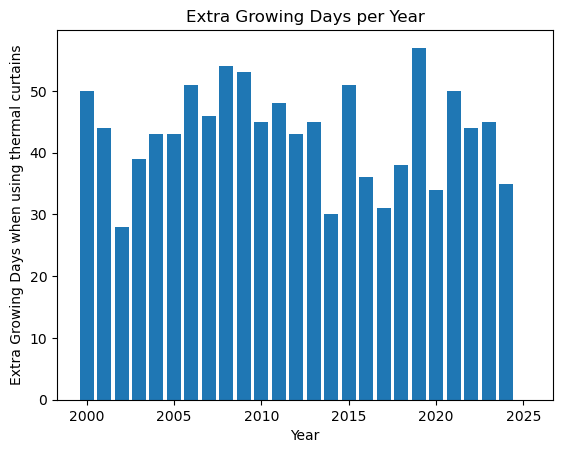

In [163]:
plt.bar(extra_growing_days_by_year["year"], extra_growing_days_by_year["total_extra_days"])
plt.title("Extra Growing Days per Year")
plt.xlabel("Year")
plt.ylabel("Extra Growing Days when using thermal curtains")
plt.show()

### Plot the extra growing days by month and year

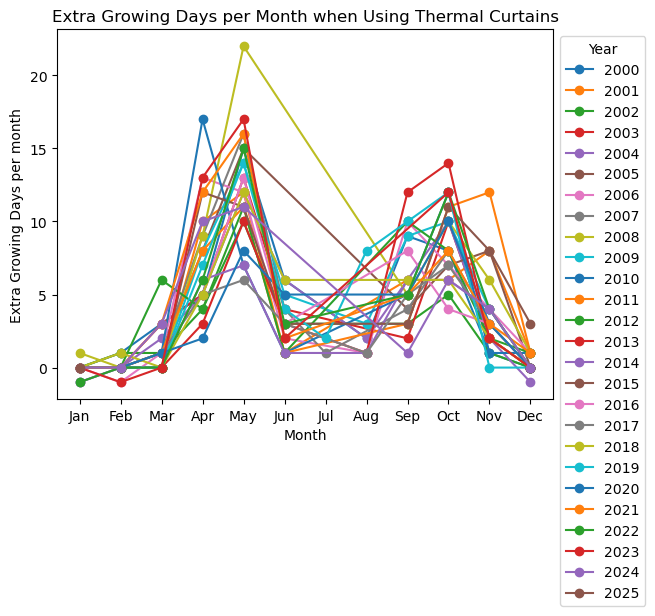

In [139]:
# Plot the data
for year in years:
    year_data = result[result["year"] == year]
    plt.plot(year_data["month"], year_data["extra_days"], marker="o", label=str(year))

plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Extra Growing Days per Month when Using Thermal Curtains")
plt.xlabel("Month")
plt.ylabel("Extra Growing Days per month")
plt.legend(title="Year", loc="best", bbox_to_anchor=(1, 1))
plt.show()

     year  month  cold_days_count  cold_days_count_thermal  extra_days  \
0    2000      1               31                     31.0         0.0   
1    2000      2               29                     28.0         1.0   
2    2000      3               31                     28.0         3.0   
3    2000      4               30                     25.0         5.0   
4    2000      5               18                      3.0        15.0   
..    ...    ...              ...                      ...         ...   
252  2024      9                1                      0.0         1.0   
253  2024     10               19                     13.0         6.0   
254  2024     11               28                     24.0         4.0   
255  2024     12               27                     27.0         0.0   
256  2025      1               10                     10.0         0.0   

     5_year_period  
0             2000  
1             2000  
2             2000  
3             2000  
4     

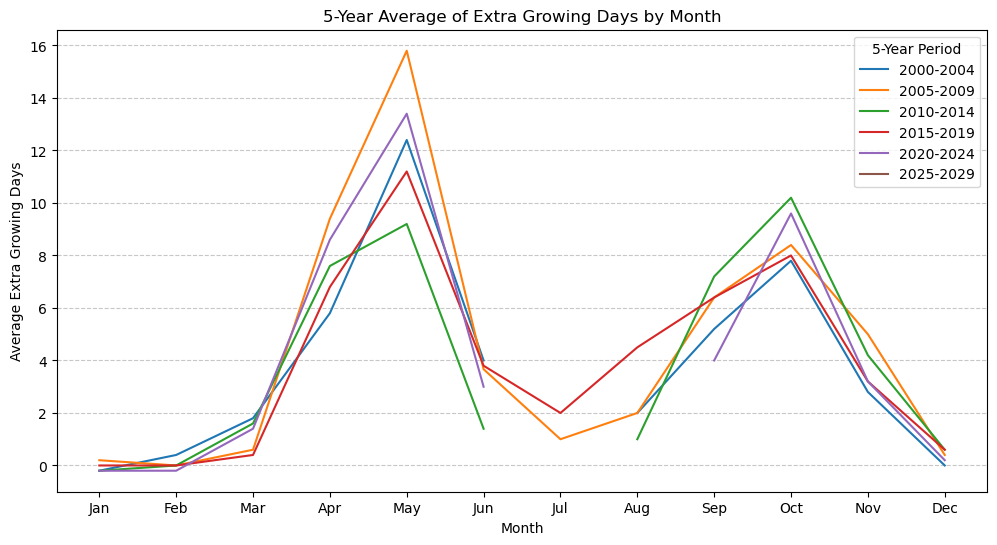

In [171]:
print(result)

# Add a column for 5-year bins
result["5_year_period"] = (result["year"] // 5) * 5

# Calculate the 5-year average for each month
monthly_averages = (
    result.groupby(["5_year_period", "month"])["extra_days"]
    .mean()
    .reset_index()
)

# Pivot the data for easier plotting
pivot_table = monthly_averages.pivot(index="month", columns="5_year_period", values="extra_days")

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each 5-year period as a line
for period in pivot_table.columns:
    plt.plot(
        pivot_table.index,
        pivot_table[period],
        label=f"{period}-{period + 4}"
    )

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Average Extra Growing Days")
plt.title("5-Year Average of Extra Growing Days by Month")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="5-Year Period")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Regression and Scikit Learn
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Root Mean Squared Error: 3.52°C


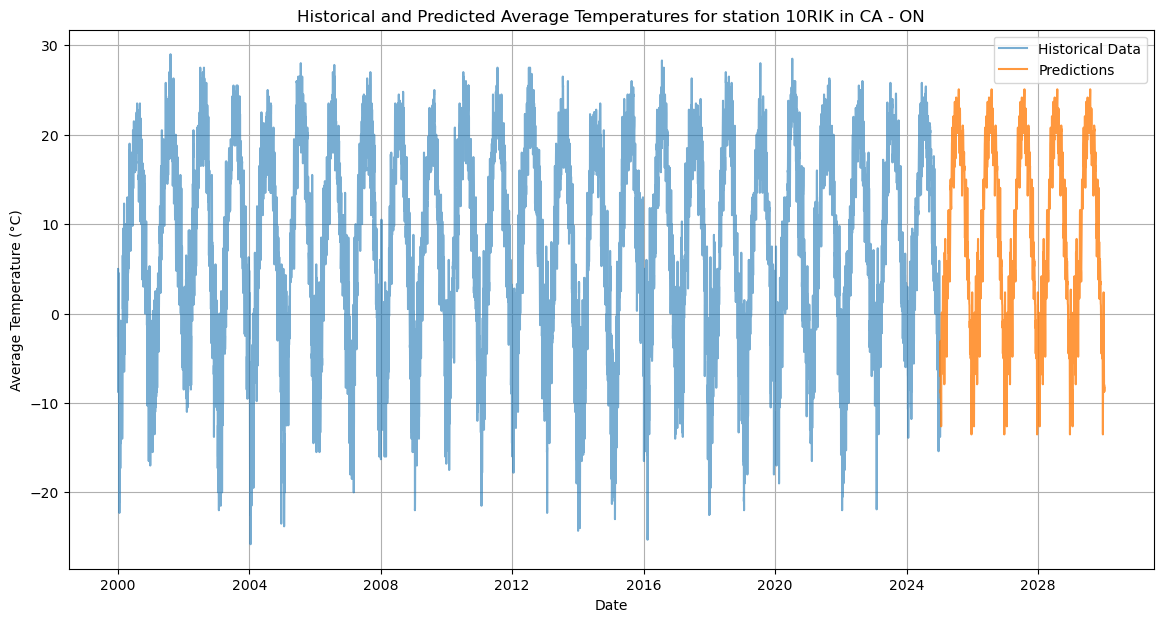

Predictions saved to 'predicted_temperatures.csv'


In [123]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import matplotlib.pyplot as plt

# Prepare Features
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
#df['year'] = df['date'].dt.year

# Features: Day of the year and year; Target: Average temperature
X = df[['day_of_year', 'year']]
y = df['avg_temp']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}°C")

# Step 7: Predict for Next 5 Years
future_years = pd.date_range(start=df['date'].max() + timedelta(days=1), 
                             periods=5 * 365, freq='D')
future_df = pd.DataFrame({
    'date': future_years,
    'day_of_year': future_years.day_of_year,
    'year': future_years.year
})
future_predictions = model.predict(future_df[['day_of_year', 'year']])
future_df['predicted_tavg'] = future_predictions

# Step 8: Plot Known Data and Predictions
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(df['date'], df['avg_temp'], label='Historical Data', alpha=0.6)

# Plot predictions
plt.plot(future_df['date'], future_df['predicted_tavg'], label='Predictions', alpha=0.8)

plt.title(f'Historical and Predicted Average Temperatures for station {chosenstation} in {chosencountry} - {chosenregion}')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Step 9: Save Predictions
future_df.to_csv('predicted_temperatures.csv', index=False)
print(f"Predictions saved to 'predicted_temperatures.csv'")

## Sci Kit Learn
https://www.askpython.com/python/examples/weather-data-clustering

In [136]:
table_name = f"{chosencountry}_{chosenregion}_data".lower()

try:
    # Connect to the database
    con = msql.connect(host='localhost', database='weather', user='root', password='')
    if con.is_connected():
        cursor = con.cursor()
                
        # Execute the SQL query
        query =f"SELECT id, date, avg_temp, min_temp, max_temp, month, year FROM `{table_name}` WHERE station_id = %s"
        cursor.execute(query, (chosenstation,))
        rows = cursor.fetchall()
        
        # Create a DataFrame
        df= pd.DataFrame(rows)
        df.columns=['id', 'date', 'avg_temp', 'min_temp', 'max_temp','month', 'year']
        
        # Print the first 5 rows
        print(df.head(5))

except msql.Error as err: 
    print(err)

finally:
    if con.is_connected():
        cursor.close()
        con.close()

        id        date avg_temp min_temp max_temp  month  year
0  10RIK_0  2000-01-01     -2.5    -11.0      6.0      1  2000
1  10RIK_1  2000-01-02      5.0     -2.0     12.0      1  2000
2  10RIK_2  2000-01-03     -0.3     -2.0      1.5      1  2000
3  10RIK_3  2000-01-04      4.5     -2.0     11.0      1  2000
4  10RIK_4  2000-01-05     -8.8    -11.5     -6.0      1  2000


https://www.askpython.com/python/examples/weather-data-clustering

c:\Users\kirst\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


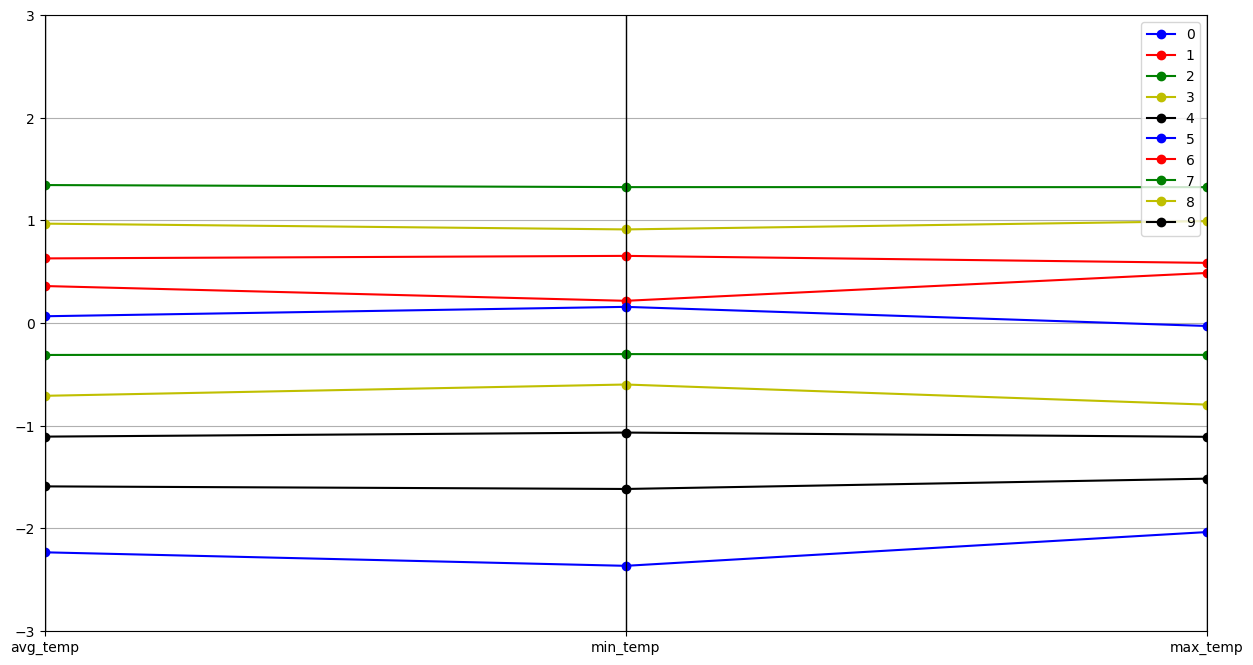

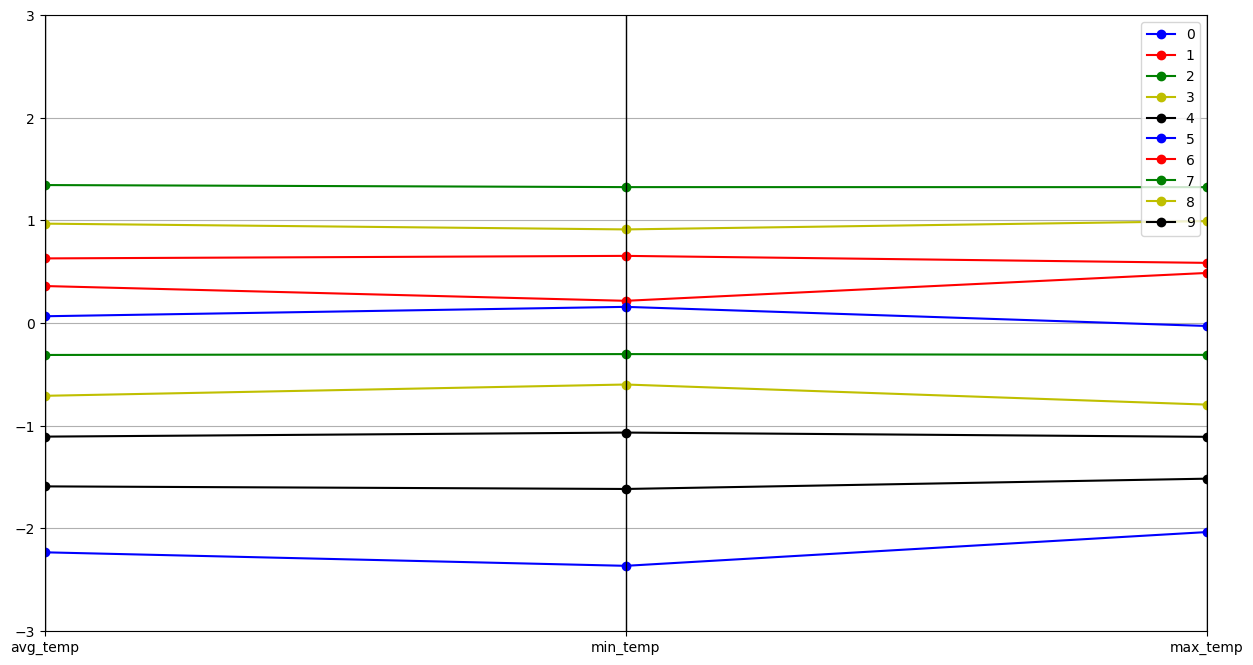

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

# Select every 10th row for faster processing

df.dropna(inplace=True)
sampled_df = df.iloc[::10]
sampled_df.shape

# Select features for clustering
features = ['avg_temp', 'min_temp', 'max_temp']
selected_df = sampled_df[features]

# Standardize the features
X = StandardScaler().fit_transform(selected_df)

# Apply KMenas clustering
KM = KMeans(n_clusters=10)
model = KM.fit(X)
centers = model.cluster_centers_

# Visualize the clusters

# 1. Function that generates a DataFrame with a Cluster Number column.
 
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
 
# 2. Function that creates Parallel Plots
 
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
 
P = pd_centers(features, centers)

parallel_plot(P[P['min_temp'] < lettuce_range1])
parallel_plot(P[P['avg_temp'] < lettuce_range1])

### Thermal curtains

The data in the below has been changed to help protect the intellectual property. Many plant crops scorch and reduce their efficiency at temperatures over 23 degrees and the traditional approach has been to whitewash growhouses. Unfortunately, this white washing is not easily removed, so whitewashes are applied at the beginning of the summer and washed off at the end, this means if there is a run of poor weather in summer the plants can't be productive and if there is good weather outside of summer the plants scorch. 

   year  month  total_hot_days  hot_near_cold_days
0  2000      1               0                   0
1  2000      2               0                   0
2  2000      3               0                   0
3  2000      4               1                   1
4  2000      5               9                   9


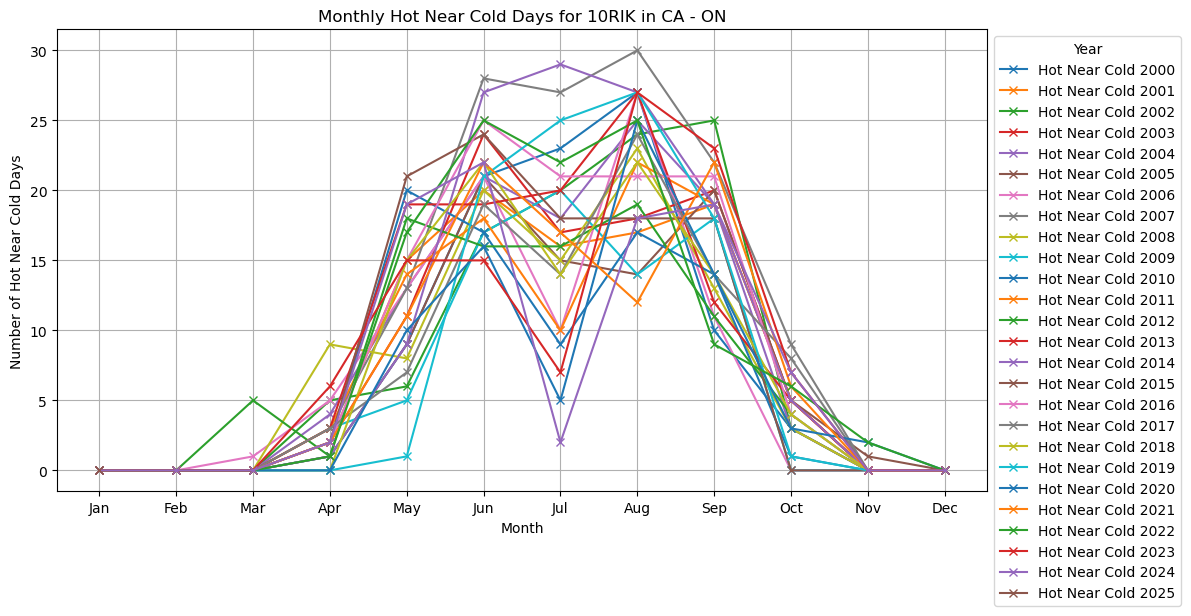

In [147]:
# Highlight data for days with maximimum temperature over the optimum for lettuce > 23 degrees and proximity to minimum temperature below the optimum for lettuce

# Identify hot days
df["hot_days"] = df["max_temp"] > lettuce_range2

# Identify cold days
df["cold_days"] = df["min_temp"] < lettuce_range1

# Identify hot days near cold days
df["cold_within_5"] = df["cold_days"].rolling(window=5, min_periods=1).max().shift(-4).fillna(0).astype(bool)

df["hot_near_cold"] = df["hot_days"] & df["cold_within_5"]

# Group by both year and month to count hot days and hot days near cold days
highlight_summary = df.groupby(["year", "month"]).agg(
    total_hot_days=("hot_days", "sum"),
    hot_near_cold_days=("hot_near_cold", "sum")
).reset_index()

# Print summary to verify
print(highlight_summary.head())

# Plot hot days and hot days near cold days
plt.figure(figsize=(12, 6))
for year in highlight_summary["year"].unique():
    year_data = highlight_summary[highlight_summary["year"] == year]
    #plt.plot(year_data["month"], year_data["total_hot_days"], marker="o", label=f"Hot Days {year}")
    plt.plot(year_data["month"], year_data["hot_near_cold_days"], marker="x", label=f"Hot Near Cold {year}")

plt.title(f"Monthly Hot Near Cold Days for {chosenstation} in {chosencountry} - {chosenregion}")
plt.xlabel("Month")
plt.ylabel("Number of Hot Near Cold Days")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="best", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

[(1)]https://dev.meteostat.net/
[(2)] https://content.ces.ncsu.edu/lettuce
[(3)] https://drygair.com/blog/what-are-the-ideal-conditions-for-greenhouse-tomatoes/
https://www.askpython.com/python/examples/weather-data-clustering

https://esciencecenter-digital-skills.github.io/lesson-machine-learning-intro/02-data-exploration.html